In [1]:
%load_ext autoreload
%autoreload 2

import sys, os
import yaml
from hypnotoad import tokamak
from hypnotoad.core.mesh import BoutMesh
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import xhermes

# %matplotlib qt


In [13]:
%matplotlib inline

# Generate grid

In [6]:
## Read input file and set grid path
gridname = "CDN_46895_v2"
path = r"C:\Users\mikek\OneDrive\Project\collab\tech\grid\MAST-U\Lin"

path_yaml = os.path.join(path, f"{gridname}.yaml")
path_grid = os.path.join(path, f"{gridname}.nc")

  nx = 65, ny = 65
361

Options
Name                                              |  Value                      
N_norm_prefactor                                  |  1.0             (default)  
extrapolate_profiles                              |  False           (default)  
finecontour_Nfine                                 |  100             (default)  
finecontour_atol                                  |  1e-12           (default)  
finecontour_diagnose                              |  False           (default)  
finecontour_extend_prefactor                      |  0.05                       
finecontour_maxits                                |  200             (default)  
finecontour_overdamping_factor                    |  0.8             (default)  
leg_extend                                        |  0.0             (default)  
leg_extend_lower_inner                            |  0.0             (default)  
leg_extend_lower_outer                            |  0.0             (default

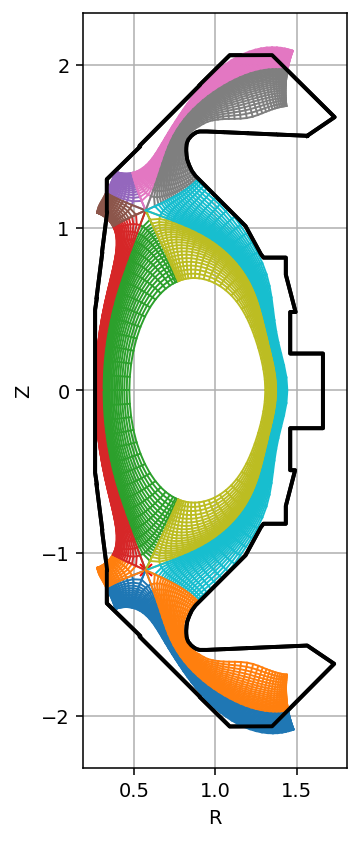

In [15]:


with open(path_yaml) as f:
    options = yaml.safe_load(f)

## Read equilibrium
with open(r"C:\Users\mikek\OneDrive\Project\collab\tech\grid\MAST-U\Lin\46895_forward_ip.geqdsk", "rt") as fh:
    eq = tokamak.read_geqdsk(fh, settings=options, nonorthogonal_settings=options)

mesh = BoutMesh(eq, options)
# mesh.redistributePoints(options)
mesh.calculateRZ()
fig, ax = plt.subplots(figsize = (5,7), dpi = 140)
# eq.plotPotential(ncontours=200, axis = ax, linewidths = 0.5)
eq.plotWall(axis = ax)
ax.plot(*eq.x_points[0], "rx",)
# mesh.plotPoints(xlow=False, ylow=False, corners=False, ax = ax, s = 2)
mesh.plotGridCellEdges(ax = ax, lw = 1)
eq.plotWall(axis = ax)
ax.grid()
ax.legend('', frameon=False)
# ax.set_xlim([0.12, 0.85]); ax.set_ylim([-0.86,0.1])     # Both lower divertors
# ax.set_xlim([0.15, 0.75]); ax.set_ylim([-0.86,-0.1])     # Both lower divertors
ax.set_xlabel("R")
ax.set_ylabel("Z")
ax.set_aspect(1)
## Save figure
fig.savefig(os.path.join(path, gridname + ".png"))


# Write grid to file

In [16]:
mesh.geometry()
mesh.writeGridfile(path_grid)

Calculate geometry
Distances inner_lower_divertor(0)
Distances inner_lower_divertor(1)
Distances inner_core(0)tances: 41
Distances inner_core(1)tances: 41
Distances inner_upper_divertor(0)
Distances inner_upper_divertor(1)
Distances outer_upper_divertor(0)
Distances outer_upper_divertor(1)
Distances outer_core(0)tances: 41
Distances outer_core(1)tances: 41
Distances outer_lower_divertor(0)
Distances outer_lower_divertor(1)
1 inner_lower_divertor(0)nces: 41
1 inner_lower_divertor(1)
1 inner_core(0)
1 inner_core(1)
1 inner_upper_divertor(0)
1 inner_upper_divertor(1)
1 outer_upper_divertor(0)
1 outer_upper_divertor(1)
1 outer_core(0)
1 outer_core(1)
1 outer_lower_divertor(0)
1 outer_lower_divertor(1)
Calculate zShiftrtor(1) calcHy 40 / 41 inner_core(1)
Calculate Metricrtor(1))ivertor(1) inner_upper_divertor(0)


# Check processor number

In [7]:
mesh = xhermes.HypnotoadGrid(path_grid)

mesh.num_processors(1, 40, verbose = True)


Checking 1 cores:   Inner or inner lower target region poloidal cell count (20) must fit an integer number of cells on each processor (200)
Checking 2 cores:   Inner or inner lower target region poloidal cell count (20) must fit an integer number of cells on each processor (100)
Checking 3 cores:   Y domain cell count (ny=200) must divide equally among Y partitions (NYPE=3)
Checking 4 cores:   Inner or inner lower target region poloidal cell count (20) must fit an integer number of cells on each processor (50)
Checking 5 cores:   Inner or inner lower target region poloidal cell count (20) must fit an integer number of cells on each processor (40)
Checking 6 cores:   Y domain cell count (ny=200) must divide equally among Y partitions (NYPE=6)
Checking 7 cores:   Y domain cell count (ny=200) must divide equally among Y partitions (NYPE=7)
Checking 8 cores:   Inner or inner lower target region poloidal cell count (20) must fit an integer number of cells on each processor (25)
Checking 9 c

[20, 40]

# Get boundary coordinates

In [2]:
%matplotlib widget

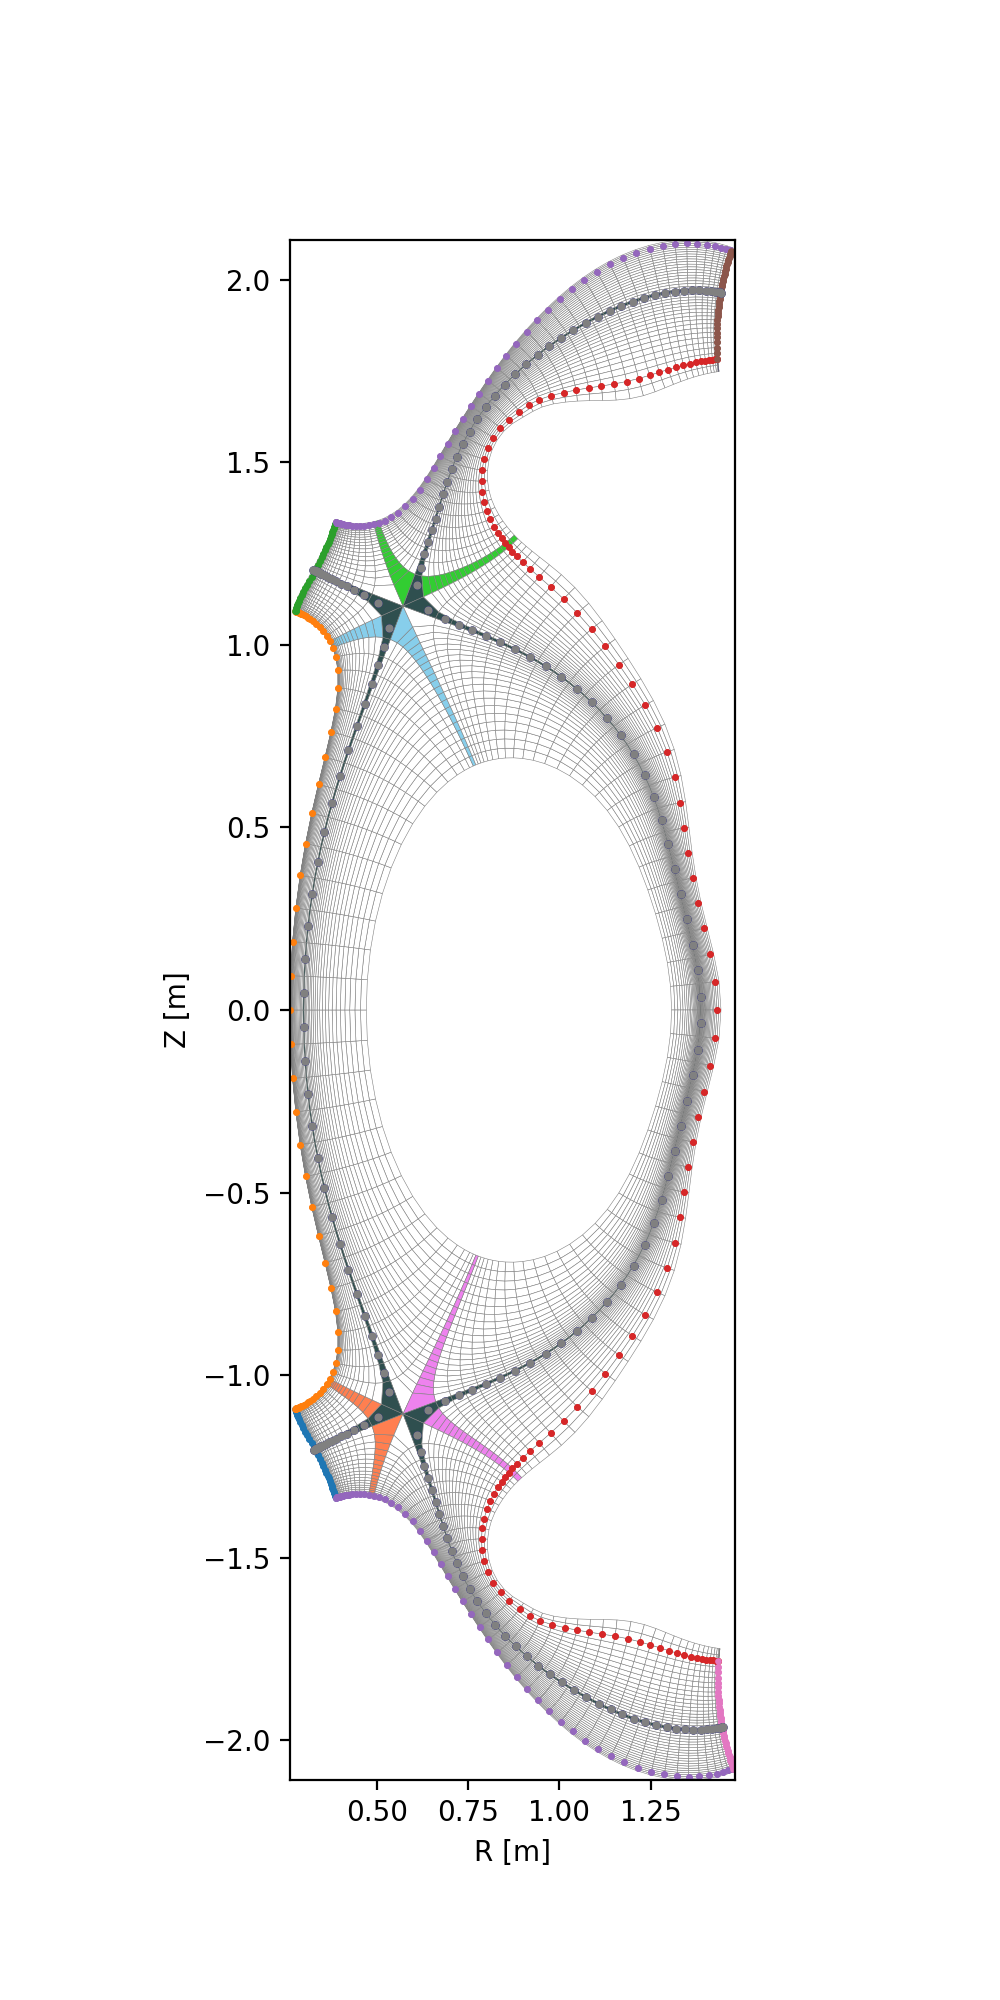

In [8]:
plt.close("all")
R = []
Z = []

ds = mesh
region = "outer_lower_target"
side = "ylow"

def get_boundary_coords(region, side):
    
    sel = xhermes.slice_2d(ds, region)

    coords = {}

    corner_map = {
        "xlow" : {
            0 : "lower_left",
            1 : "upper_left"},
        "xup" : {
            0 : "lower_right",
            1 : "upper_right"},
        "ylow" : {
            0 : "lower_left",
            1 : "lower_right"},
        "yup" : {
            0 : "upper_left",
            1 : "upper_right"}
    }

    for coord in ["R", "Z"]:
        coords[coord] = np.concatenate([ds[f"{coord}xy_{corner_map[side][0]}_corners"][sel].data,
                                        ds[f"{coord}xy_{corner_map[side][1]}_corners"][sel].data])       
        
    return coords
    
region_coords = {}
region_coords["inner_lower_target"] = get_boundary_coords("inner_lower_target", "ylow")
region_coords["sol_inner_boundary"] = get_boundary_coords("sol_inner_boundary", "xup")
region_coords["inner_upper_target"]  = get_boundary_coords("inner_upper_target", "yup")
region_coords["sol_outer_boundary"] = get_boundary_coords("sol_outer_boundary", "xup")
region_coords["pfr_boundary"] = get_boundary_coords("pfr_boundary", "xlow")
region_coords["outer_upper_target"] = get_boundary_coords("outer_upper_target", "ylow")
region_coords["outer_lower_target"] = get_boundary_coords("outer_lower_target", "yup")
    
fig, ax = plt.subplots(figsize = (5,10), dpi = 200)

# xhermes.plot_rz_grid(ds.remove_guards(), ax = ax, mode = "poloidal", legend = False)
xhermes.plot_rz_grid(ds, ax = ax, mode = "poloidal", legend = False)

df = pd.DataFrame()
R = []
Z = []
for name, coords in region_coords.items():
    R += coords["R"].tolist()
    Z += coords["Z"].tolist()
    ax.scatter(coords["R"], coords["Z"], label = name, s = 2)
    
df["R"] = R
df["Z"] = Z


In [64]:
df.to_csv(r"C:\Users\mikek\OneDrive\Project\collab\tech\grid\MAST-U\Lin\CDN_46895_v2_boundary_corner_RZ.csv")

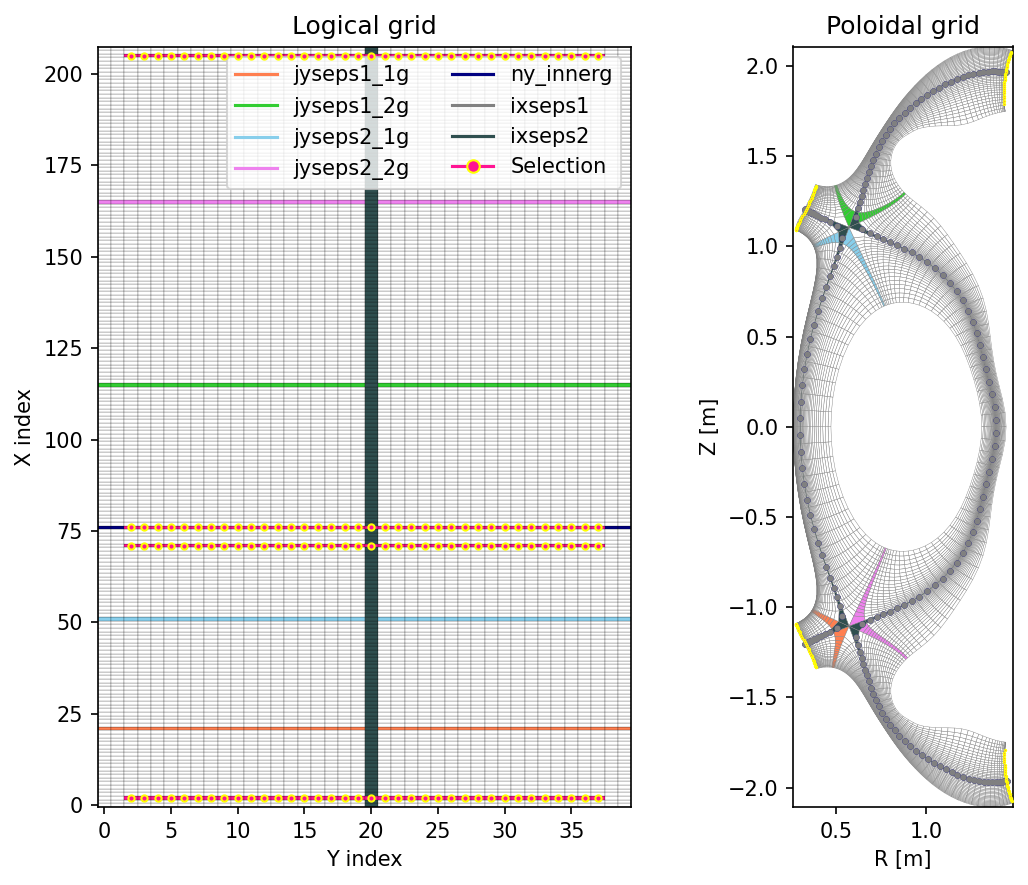

In [24]:
xhermes.plot_region(mesh, "targets")

In [10]:
16*2 + 32 + 36*2 + 48

184

In [11]:
20*2 + 30 + 40*2 + 50

200

In [86]:
for i in range(1, 17):
   print(f"Checking {i} cores:   {mesh.check_decomposition(1, i)}")

Checking 1 cores:   (False, 'Inner or inner lower target region poloidal cell count (18) must fit an integer number of cells on each processor (184)')
Checking 2 cores:   (False, 'Inner or inner lower target region poloidal cell count (18) must fit an integer number of cells on each processor (92)')
Checking 3 cores:   (False, 'Y domain cell count (ny=184) must divide equally among Y partitions (NYPE=3)')
Checking 4 cores:   (False, 'Inner or inner lower target region poloidal cell count (18) must fit an integer number of cells on each processor (46)')
Checking 5 cores:   (False, 'Y domain cell count (ny=184) must divide equally among Y partitions (NYPE=5)')
Checking 6 cores:   (False, 'Y domain cell count (ny=184) must divide equally among Y partitions (NYPE=6)')
Checking 7 cores:   (False, 'Y domain cell count (ny=184) must divide equally among Y partitions (NYPE=7)')
Checking 8 cores:   (False, 'Inner or inner lower target region poloidal cell count (18) must fit an integer number o

In [70]:
valid_split(nxpe = 1, nprocs = 30)

(False,
 'Y domain cell count (ny=100) must divide equally among Y partitions (NYPE=30)')